This script is designed to ingest csv data from the NYT covid data on GitHUb, and arrange it for analysis

Currently, this script only works on country-wide and state-level data, and only has population data for the US, IL, WV, Cook Co IL, and Kanawha Co WV.

The driving idea here was to graph a rolling two week sum of new cases, the maximum period where someone with CoV19 could be contagious.
From there, that sum is converted to a percentage of the region's population.

First, each region's stats are presented alone, first over the roughly three-year period, then with each year layered on top of each other.

Second, The region's stats are compared, first by raw data, then by percentage.  This is where percentage is most important, because it 
offers comparison between regions with varying population sizes.

In [1]:
#imports

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from random import randrange
import os
import urllib

In [4]:
# functions

# These two functions pull the data from the nyt GitHub site

def get_filename(link): # pulls file name from url
    split_list = link.split(sep='/')
    return split_list[len(split_list) -1]

def download_from_link(url): # requests and writes file to disk, returns df
    filename = get_filename(url)
    print(filename)
    filepath = f'{os.getcwd()}/covidCSV/{filename}'
    res = requests.get(url, allow_redirects=True)
    with open(filepath,'wb') as file:
         file.write(res.content)
    file_to_df = pd.read_csv(filepath)
    return file_to_df

# def query_pop(country, state=None,county=None, yearfig=None):
#     column_list = ['STNAME','ESTIMATESBASE2020','POPESTIMATE2020','POPESTIMATE2021']
    
#     #sets index for list "Columns" to be queried
#     if yearfig == None:
#         x = None
#     elif yearfig == 'BASE20':
#         x=1
#     elif yearfig == 'EST20':
#         x=2
#     elif yearfig == 'EST21':
#         x=3

#     # to handle None + 1
#     try:
#         y = x+1
#     except TypeError:
#         y = None
    
#     pop_data = pd.DataFrame(census_data.loc[0:, census_data.columns[5:10]])
    
#     if state==None and county==None and yearfig==None:
#         return pop_data.loc[pop_data['STNAME']==pop_data['CTYNAME']].drop_duplicates().sum()[2:5]
#     elif state==None and county==None: 
#         return pop_data.loc[pop_data['STNAME']==pop_data['CTYNAME']].drop_duplicates().sum()[x:y]
#     elif county==None:
#         return pop_data.loc[(pop_data['STNAME']==pop_data['CTYNAME']) & (pop_data['STNAME']==f'{state}'), column_list[x:y]]
#     else: return pop_data.loc[(pop_data['STNAME']==f'{state}') & (pop_data['CTYNAME']==f'{county}'), pop_data.columns[x:y]]


# # calculates new cases per day, 14 day rolling sum, and compares sum to regional population, returns new df
# def tranform_case_column(df, country, state=None,county=None,yearfig=None):
#     poulation = query_pop(country=country, state=state, county=county, yearfig=yearfig)
#     daily_diff = df['cases'].diff()
#     twoWeekSum = daily_diff.rolling(14).sum()
#     sum_2_pop = (twoWeekSum / population[f'{region}']) * 100
#     total_2_pop = (df['cases'] / population[f'{region}']) * 100

#     dfshape = {'date':df['date'],'new cases':daily_diff,'2 week sum':twoWeekSum,'2 week sum as percent of population':sum_2_pop, 'case totals as percent of population':total_2_pop}
#     return pd.DataFrame(dfshape)

# # for state df, allows you to filter to single state.
# def get_state_rows(df, state, county=None):
#     if county == None:
#         state_data = df.index[df['state'] == state]
#     else:  state_data = df.index[(df['state'] == state) & (df['county'] == county)]
#     thisDF = pd.DataFrame(columns=df.columns)
#     thisDF = thisDF.append([df[i:i+1] for i in state_data], ignore_index=True)
#     return thisDF

# def get_state_rows2(df, state, county=None):
#     if county == None:
#         state_data = df.loc[df['state'] == state]
#     else:  state_data = df.loc[(df['state'] == state) & (df['county'] == county)]
#     # thisDF = pd.DataFrame(columns=df.columns)
#     # thisDF = thisDF.append([df[i:i+1] for i in range(state_data).count()], ignore_index=True)
#     return state_data

# # def get_county

def pd_search_tool(df, column,term): # just an attempt to simplify searches
    search = df.index[df[column] == term]
    return search[0]
    # need a way change operator, maybe with if statements

# population = {'USA':331449281, 'West Virginia': 1793716, 'Illinois': 12812508, 'Cook': 5275541, 'Kanawha': 180745}

In [46]:
# def scrape_for_populations(): 
#     #scrape State population data: this section I used a very inelegant beatiful soup approach
#     wiki_table_states = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States#States'
#     states_html = requests.get(wiki_table_states)
#     raw_data = states_html.text

#     soup = BeautifulSoup(raw_data, 'html.parser')

#     pop_data = pd.DataFrame(columns=["Name", "Population"])

#     for row in soup.find_all('tbody')[1].find_all('tr'):
#         col = row.find_all('td')
#         if (col != []):
#             abb = col[0].text
#             if len(col) == 11:
#                 popul = col[3].text
#             else: popul = col[4].text
            
#             pop_data = pop_data.append({"abb":abb,"Population":popul}, ignore_index=True)

#     name_data = pd.DataFrame(columns=["Name"])

#     for row in soup.find_all('tbody')[1].find_all('tr'):
#         col = row.find_all('a')
#         if (col != []):
#             name = col[0].text
#             if ' ' in name:
#                 name = name.replace(' ', '_')
            
#         name_data = name_data.append({"Name":name}, ignore_index=True)

#     state_dict = {pop_data['abb'][i][:len(pop_data.abb[i])-1]:{'Population':pop_data['Population'][i][:len(pop_data.Population[i])-1],"Full name":name_data.Name[i+2], 'County': {}} for i in range(pop_data.abb.count())}


#     #this was originally it own function. When I realized it depended on global variables, i just wrote it in line with a for loop.  
#     # as I progress, I can figure out how to get the functions to communicate more closely(possin=bly through class inheritance?)

#     # Get County Population Data
#     for state in list(state_dict.keys()):
#         url = f'https://en.wikipedia.org/wiki/List_of_counties_in_{state_dict[state]["Full name"]}'
#         #print(state_dict[state]["Full name"])

#         with urllib.request.urlopen(url) as i:
#             html = i.read()
        
#         # this code searches scraped data for the term "Pop", to find the table containig a population column
#         x = 0
#         match_table = []
#         while match_table == []:
#             data_try = pd.read_html(html)[x]

#             #this took some time to troubleshoot.  Sometimes a value error would appear
#             if not isinstance([s for s in data_try][0], int):
#                 match_table = [s for s in data_try if "Pop"in s]
#                 # print(f'match-table ={match_table}')
#             elif isinstance([s for s in data_try][0], int):
#                 pass
#             x += 1
#         else: pass
        
#         #this block searches for the proper territory term.  LA and AK are the only exceptions that require this
#         terms = ['County','Parish', 'Borough']
#         for term in terms:
#             if term in data_try.columns:
#                 correct_term = term

#         match_pop = [s for s in data_try.columns if "Pop"in s][0]

#         #print(correct_term)

#         dictus = {data_try[correct_term][i][:data_try[correct_term][i].find(' ')] : data_try[match_pop][i] for i in range(data_try[correct_term].count())}
#         #return dictus

#         #for state in list(state_dict.keys()):
#         state_dict[state]['County'] =  dictus
    
#     #get US Population from Wikipedia
#     url = 'https://en.wikipedia.org/wiki/United_States'
#     with urllib.request.urlopen(url) as i:
#         html = i.read()
        
#     getPop = pd.read_html(html)[0]
#     USpop = {getPop.iloc[i][0][2:].replace('\xa0',' ') : getPop.iloc[i][1][:getPop.iloc[30][1].find("[")] for i in range(30,32)}

#     return {'USA': {'Population': USpop, 'State': state_dict}}

# # simple tool to make finding population data easier
# def lookup_state_pop (country, state=None, county=None):
#     if state == None and county == None:
#         return populations[f'{country}']['Population']
#     elif county == None:
#         return populations[f'{country}']['State'][f'{state}']['Population']
#     else: return populations[f'{country}']['State'][f'{state}']['County'][f'{county}']

In [3]:
# visualize data
# this should maybe be a class?

# graph data over full 3 year period
def graph_over_time(df, column):

    # separate search data by year
    end_of_20 = pd_search_tool(df, 'date', '2021-01-01')
    end_of_21 = pd_search_tool(df, 'date', '2022-01-01')
    end_of_22 = pd_search_tool(df, 'date', '2023-01-01')
    
    # visualize
    f = plt.figure()
    f.set_figwidth(20)

    # x axis = dates, y axis = selected column
    plt.plot(df.date[0:end_of_20],df[f'{column}'][0:end_of_20], color='blue', label='2020')
    plt.plot(df.date[end_of_20:end_of_21],df[f'{column}'][end_of_20:end_of_21], color='purple', label='2021')
    plt.plot(df.date[end_of_21:end_of_22],df[f'{column}'][end_of_21:end_of_22], color='red', label='2022')
    plt.plot(df.date[end_of_22:],df[f'{column}'][end_of_22:], color='orange', label='2023')
    plt.legend(loc='upper left')
    plt.ylabel(f'{column}')
    plt.title(label=f'{column} over all time')

    plt.show

def graph_year_overlap(df,column):
     
     # separate data by year
    end_of_20 = pd_search_tool(df, 'date', '2021-01-01')
    end_of_21 = pd_search_tool(df, 'date', '2022-01-01')
    end_of_22 = pd_search_tool(df, 'date', '2023-01-01')

    # reset indexes so the year overlay
    df2020 = pd.DataFrame(df[f'{column}'][0:end_of_20]).set_index(pd.Index(range(0, end_of_20)))
    df2021 = pd.DataFrame(df[f'{column}'][end_of_20:end_of_21]).set_index(pd.Index(range(0, (end_of_21 - end_of_20))))
    df2022 = pd.DataFrame(df[f'{column}'][end_of_21:end_of_22]).set_index(pd.Index(range(0, (end_of_22-end_of_21))))
    df2023 = pd.DataFrame(df[f'{column}'][end_of_22:]).set_index(pd.Index(range(0, ((df.count()[0])-end_of_22))))

    # create NaNs for dates prior to first US case in 2020
    dummy_row = pd.Series({0:np.nan},index=[0]) 

    # find num of rows needs to align 2020 data
    xtra = datetime.strptime(df['date'][0], "%Y-%m-%d") - datetime.strptime('2020-01-01', "%Y-%m-%d")
    
    # add rows
    for i in range(xtra.days):
        df2020 = pd.concat([dummy_row, df2020]).reset_index(drop = True)

    # visualize
    f = plt.figure()
    f.set_figwidth(20)

    # x axis = days of year, y axis = selcted column
    plt.plot(df2020, color='blue', label='2020')
    plt.plot(df2021, color='purple', label='2021')
    plt.plot(df2022, color='red', label='2022')
    plt.plot(df2023, color='orange', label='2023')
    plt.legend(loc='upper left')
    plt.xticks(np.arange(0,365, 30))
    plt.xlabel('in days (not months)')
    plt.ylabel(f'{column}')
    plt.title(label=f'{column}, all years overlaid')

    plt.show

def regional_comparison(df_list, column):

    # throw error if first var is not list 
    #plot_num = len(df_list)

    f = plt.figure()
    f.set_figwidth(20)
    f.set_facecolor('black')

    plt.style.use('dark_background')
    
    for name, df in enumerate(df_list):
        r = randrange(50,100) * 0.01
        g = randrange(50,100) * 0.01
        b = randrange(50,100) * 0.01
        plt.plot(df.date,df[f'{column}'], color=(r,g,b), label=f'df{name +1}')

    plt.legend(loc='upper left')
    plt.ylabel(f'{column}')
    plt.title(label=f'{column} over all time')

    plt.show

In [72]:
#create populations dict
# populations = scrape_for_populations()



In [5]:
# create folder in current path
!mkdir -p covidCSV
# get census data from csv
census_data = download_from_link('https://www2.census.gov/programs-surveys/popest/datasets/2020-2021/counties/totals/co-est2021-alldata.csv')
pop_data = pd.DataFrame(census_data.loc[0:, census_data.columns[5:10]])

# get files for US and State DFs
USdf = download_from_link('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
statedf = download_from_link('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

# download all 4 csv files and append to DF
all_counties_df = pd.DataFrame(columns=['date', 'county', 'state', 'fips', 'cases', 'deaths'])
for file_year in range(2020, 2024):
    counties = f'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-{file_year}.csv'
    all_counties_df = all_counties_df.append(download_from_link(counties),ignore_index=True )

co-est2021-alldata.csv
us.csv
us-states.csv
us-counties-2020.csv
us-counties-2021.csv
us-counties-2022.csv
us-counties-2023.csv


US population

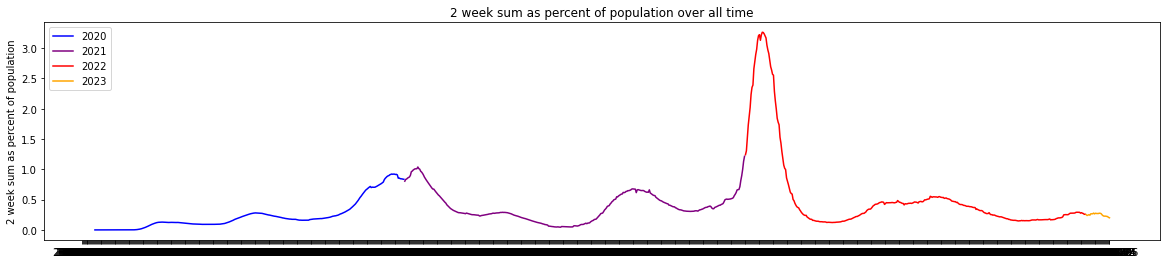

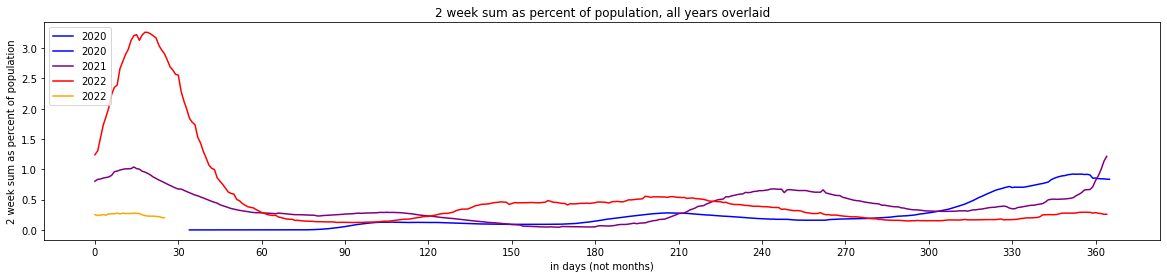

In [12]:
cov_USdf = tranform_case_column(USdf, 'USA')
graph_over_time(cov_USdf, '2 week sum as percent of population')
graph_year_overlap(cov_USdf, '2 week sum as percent of population')

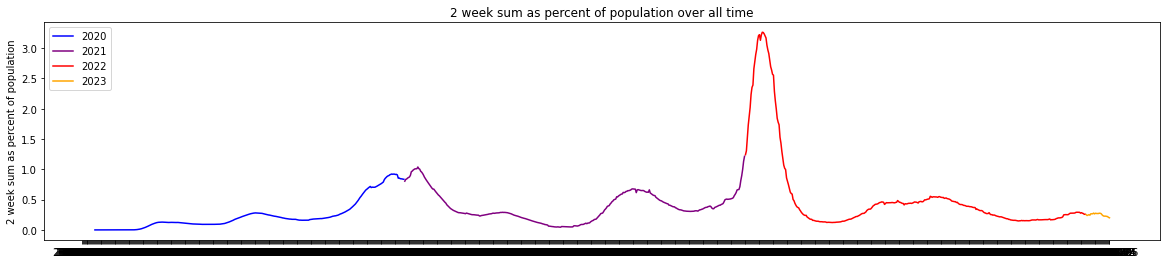

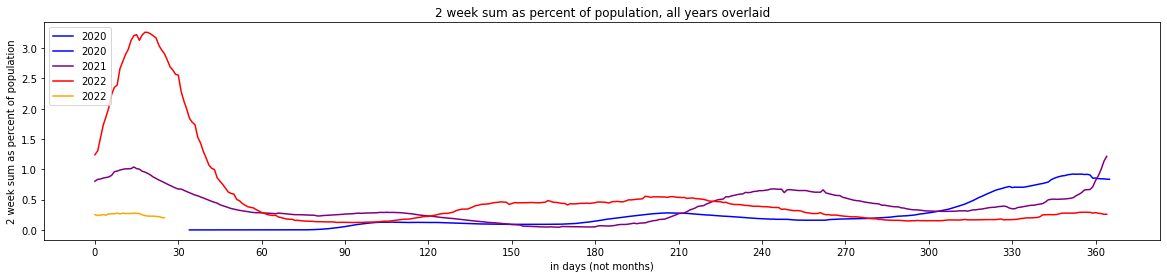

In [13]:
cov_USdf = USdf.merge(tranform_case_column(USdf, 'USA'), how='left',on='date')
cov_USdf.tail()
graph_over_time(cov_USdf, '2 week sum as percent of population')
graph_year_overlap(cov_USdf, '2 week sum as percent of population')

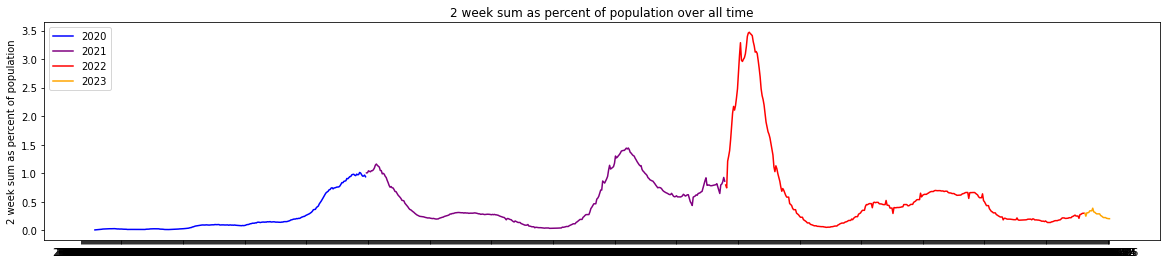

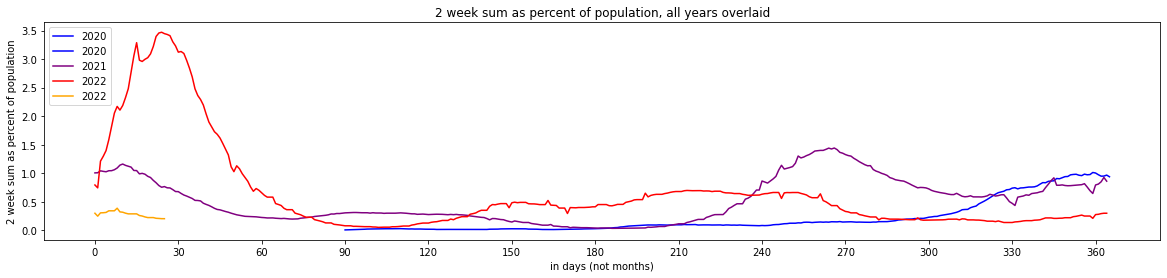

In [10]:
wvDF = get_state_rows(statedf,'West Virginia')
cov_WVdf = tranform_case_column(wvDF, 'West Virginia')
graph_over_time(cov_WVdf, '2 week sum as percent of population')
graph_year_overlap(cov_WVdf, '2 week sum as percent of population')

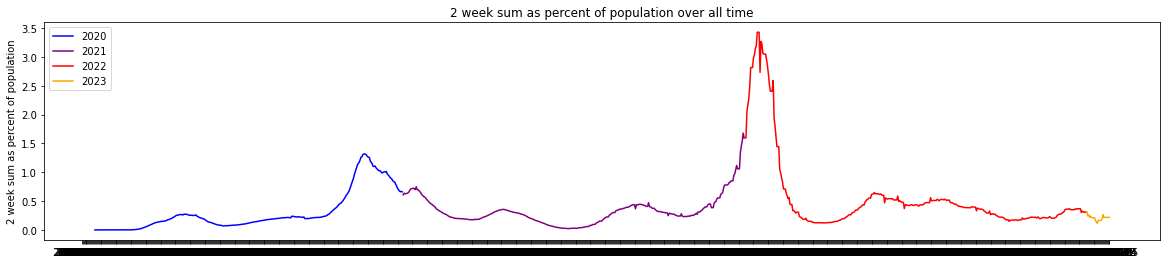

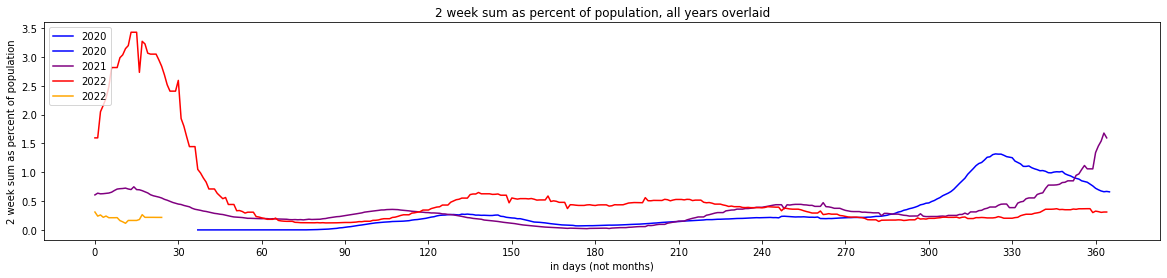

In [10]:
ilDF = get_state_rows(statedf, 'Illinois')
cov_ILdf = tranform_case_column(ilDF, 'Illinois')
graph_over_time(cov_ILdf, '2 week sum as percent of population')
graph_year_overlap(cov_ILdf, '2 week sum as percent of population')

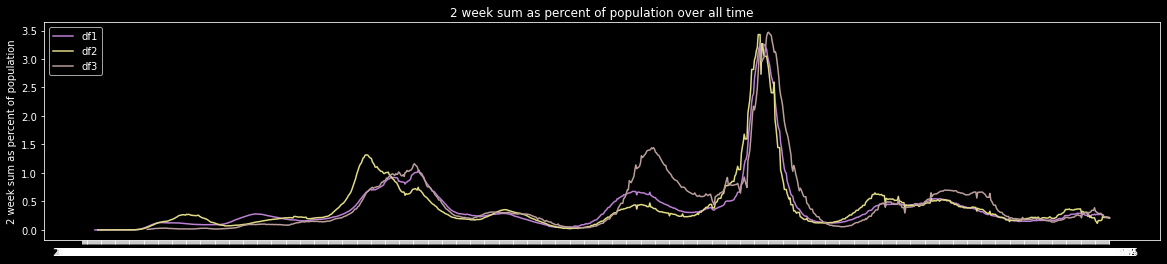

In [11]:
regional_comparison([cov_USdf,cov_ILdf,cov_WVdf], '2 week sum as percent of population')

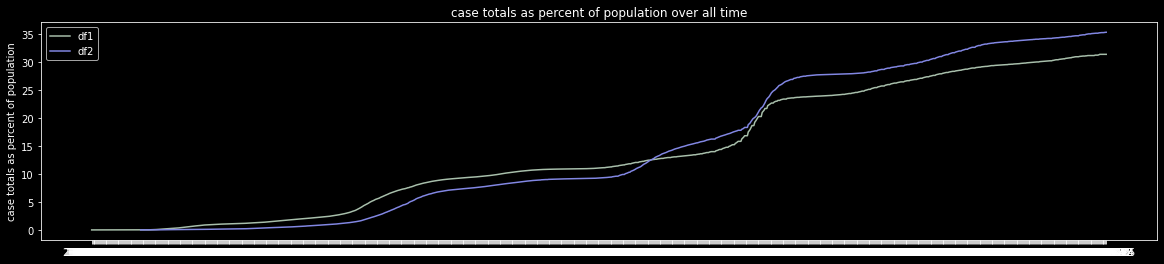

In [12]:
regional_comparison([cov_ILdf,cov_WVdf], 'case totals as percent of population')

In [ ]:
class Country:
    def __init__(self, name):
        self.name = name
    def display_name(self):
        print("Country name: " + self.name)

class State(Country):
    def __init__(self, name, state_name):
        self.state_name = state_name
        Country.__init__(self, name)
    def display_name(self):
        print("State name: " + self.state_name)

class County(State):
    def __init__(self, name, state_name, county_name):
        self.county_name = county_name
        State.__init__(self, name, state_name)
    def display_name(self):
        print("County name: " + self.county_name)

county = County("United States of America", "Texas", "Travis")
county.display_name()

County name: Travis


{'2022 estimate': '333,287,557', '2020 census': '331,449,281'}

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [7]:
def tranform_data(country='USA', state=None,county=None, yearfig=None):
    new_df = all_counties_df.loc[(all_counties_df['state'] == state)& (all_counties_df['county'] == county)]

    # poulation = query_pop(country='USA', state='California', county='Orange County', yearfig='EST20')
    pop_data = pd.DataFrame(census_data.loc[0:, census_data.columns[5:10]])
    column_list = ['STNAME','ESTIMATESBASE2020','POPESTIMATE2020','POPESTIMATE2021']
        
        #sets index for list "Columns" to be queried
    if yearfig == None:
        x = 2
    elif yearfig == 'BASE20':
        x=1
    elif yearfig == 'EST20':
        x=2
    elif yearfig == 'EST21':
        x=3

    y = x + 1

    if state==None and county==None: 
        population = pop_data.loc[pop_data['STNAME']==pop_data['CTYNAME']].drop_duplicates().sum()[x:y]
        new_df = USdf
    elif county==None:
        population = pop_data.loc[(pop_data['STNAME']==pop_data['CTYNAME']) & (pop_data['STNAME']==f'{state}'), column_list[x:y]]
        new_df = statedf.loc[(statedf['state'] == state)]
    else: 
        population =  pop_data.loc[(pop_data['STNAME']==f'{state}') & (pop_data['CTYNAME']==f'{county} County'), pop_data.columns[x:y]]
        new_df = all_counties_df.loc[(all_counties_df['state'] == state)& (all_counties_df['county'] == county)]

    daily_diff = new_df['cases'].diff()
    day7avg = daily_diff.rolling(7).sum() / 7
    twoWeekSum = daily_diff.rolling(14).sum()
    sum_2_pop = (twoWeekSum / int(population.iloc[0])) * 100
    total_2_pop = (new_df['cases'] / int(population.iloc[0])) * 100

    dfshape = {'date':new_df['date'],'new cases':daily_diff,'7 day average':day7avg,'2 week sum':twoWeekSum,'2 week sum as percent of population':sum_2_pop, 'case totals as percent of population':total_2_pop}
    # return pd.DataFrame(dfshape)
    newer_df = pd.DataFrame(dfshape)
    return new_df.merge(newer_df, how='left',on='date')





In [8]:
US = tranform_data()
US.columns


Index(['date', 'cases', 'deaths', 'new cases', '7 day average', '2 week sum',
       '2 week sum as percent of population',
       'case totals as percent of population'],
      dtype='object')

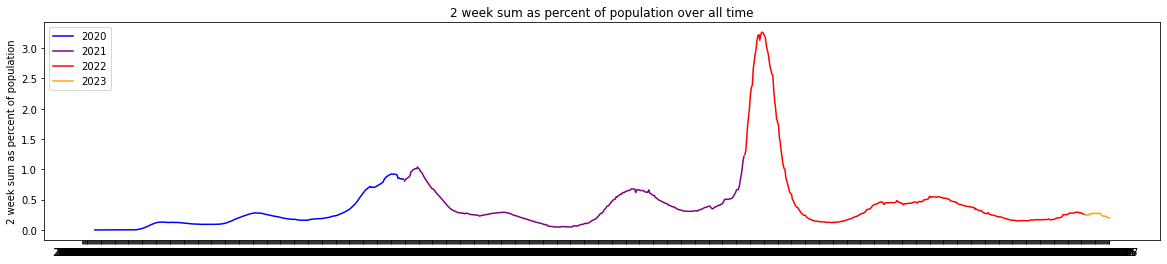

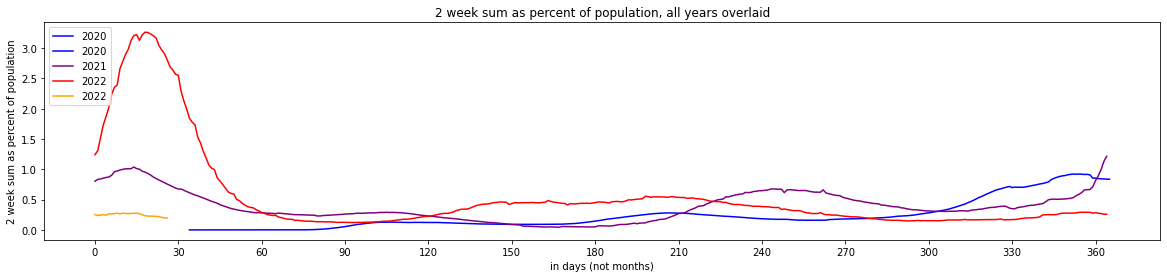

In [17]:
graph_over_time(US, '2 week sum as percent of population')
graph_year_overlap(US, '2 week sum as percent of population')

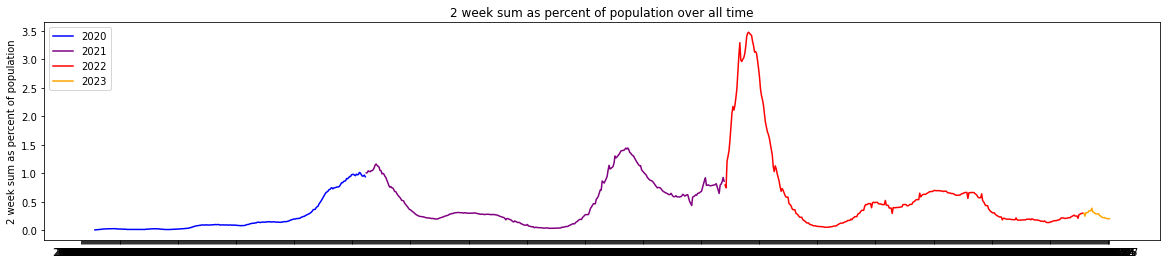

In [20]:
WV = tranform_data(country='USA',state='West Virginia')
graph_over_time(WV, '2 week sum as percent of population')

In [21]:
CA = tranform_data(country='USA', state='California')
CA

,date,state,fips,cases,deaths,new cases,7 day average,2 week sum,2 week sum as percent of population,case totals as percent of population
0,2020-01-25,California,6,1,0,NaN,NaN,NaN,NaN,0.000003
1,2020-01-26,California,6,2,0,1.0,NaN,NaN,NaN,0.000005
2,2020-01-27,California,6,2,0,0.0,NaN,NaN,NaN,0.000005
3,2020-01-28,California,6,2,0,0.0,NaN,NaN,NaN,0.000005
4,2020-01-29,California,6,2,0,0.0,NaN,NaN,NaN,0.000005
...,...,...,...,...,...,...,...,...,...,...
1094,2023-01-23,California,6,11957890,102025,2230.0,4451.142857,71070.0,0.179925,30.273340
1095,2023-01-24,California,6,11958856,102053,966.0,4134.142857,70601.0,0.178738,30.275786
1096,2023-01-25,California,6,11960085,102102,1229.0,4102.000000,69239.0,0.175290,30.278897
1097,2023-01-26,California,6,11979032,102259,18947.0,3512.857143,53907.0,0.136474,30.326864


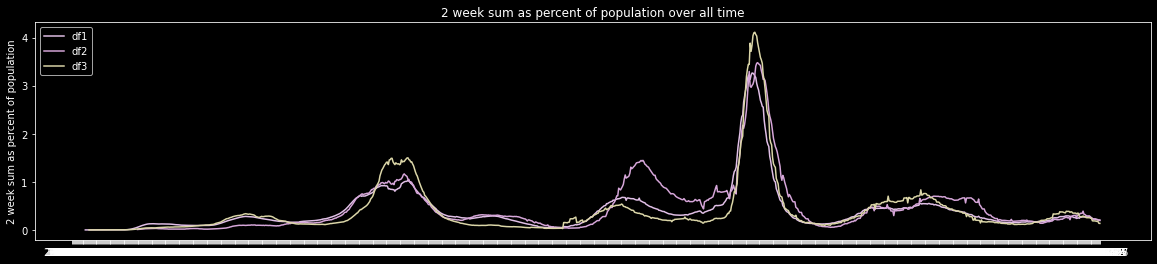

In [22]:
regional_comparison([US,WV,CA], '2 week sum as percent of population')

In [111]:
CAdf23 = CAdf2.merge(CAdf22,how='left',on='date')
CAdf23

,date,county,state,fips,cases_x,deaths,cases_y,new cases,2 week sum,2 week sum as percent of population,case totals as percent of population
0,2020-03-17,Jefferson,West Virginia,54037.0,1,0.0,1,NaN,NaN,NaN,0.000056
1,2020-03-18,Jefferson,West Virginia,54037.0,1,0.0,1,0,NaN,NaN,0.000056
2,2020-03-18,Jefferson,West Virginia,54037.0,1,0.0,1,0,NaN,NaN,0.000056
3,2020-03-18,Mercer,West Virginia,54055.0,1,0.0,1,0,NaN,NaN,0.000056
4,2020-03-18,Mercer,West Virginia,54055.0,1,0.0,1,0,NaN,NaN,0.000056
...,...,...,...,...,...,...,...,...,...,...,...
3075242,2023-01-26,Wyoming,West Virginia,54109.0,9543,135.0,2828,-8771,332.0,0.018509,0.157662
3075243,2023-01-26,Wyoming,West Virginia,54109.0,9543,135.0,5421,2593,2868.0,0.159892,0.302222
3075244,2023-01-26,Wyoming,West Virginia,54109.0,9543,135.0,1731,-3690,-9234.0,-0.514797,0.096504
3075245,2023-01-26,Wyoming,West Virginia,54109.0,9543,135.0,27838,26107,7154.0,0.398837,1.551974


In [156]:
d = {1:{2:3,4:{5:{6:7,8:9},10:{11:12,13:14,15:16,18:19}}}}
d

{1: {2: 3, 4: {5: {6: 7, 8: 9}, 10: {11: 12, 13: 14, 15: 16, 18: 19}}}}

False

In [208]:
US.to_csv('/Users/chriskimmons/Desktop/USdata_cleaned.csv')

In [210]:
def clean_county_csv

/Users/chriskimmons/My Projects/NYT_COV


/Users/chriskimmons/My Projects/NYT_COV
